<a href="https://colab.research.google.com/github/rahulmukati67/ML_LAB/blob/main/Copy_of_Image_Classification_using_ANN_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Joint Online Faculty Development programme on Deep Learning (Parallel Architecture) Aug 23 – Sep 3 , 2021

# Tutorial 4: Covid 19 Prediction using Artificial Neural Networks

Dataset: [Covid 19 Chest X-ray dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)


A team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh along with their collaborators from Pakistan and Malaysia in collaboration with medical doctors have created a database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images. This COVID-19, normal, and other lung infection dataset is released in stages. In the first release, we have released 219 COVID-19, 1341 normal, and 1345 viral pneumonia chest X-ray (CXR) images. In the first update, we have increased the COVID-19 class to 1200 CXR images. In the 2nd update, we have increased the database to 3616 COVID-19 positive cases along with 10,192 Normal, 6012 Lung Opacity (Non-COVID lung infection), and 1345 Viral Pneumonia images. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients.



**1. Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Move to the place where data resides**

In [ ]:
cd /content/covid_dataset.zip

[Errno 20] Not a directory: '/content/covid_dataset.zip'
/content/covid_dataset


In [ ]:
!ls

COVID-10.png  COVID-1.png   COVID-29.png  COVID-38.png	COVID-47.png
COVID-11.png  COVID-20.png  COVID-2.png   COVID-39.png	COVID-48.png
COVID-12.png  COVID-21.png  COVID-30.png  COVID-3.png	COVID-49.png
COVID-13.png  COVID-22.png  COVID-31.png  COVID-40.png	COVID-4.png
COVID-14.png  COVID-23.png  COVID-32.png  COVID-41.png	COVID-50.png
COVID-15.png  COVID-24.png  COVID-33.png  COVID-42.png	COVID-5.png
COVID-16.png  COVID-25.png  COVID-34.png  COVID-43.png	COVID-6.png
COVID-17.png  COVID-26.png  COVID-35.png  COVID-44.png	COVID-7.png
COVID-18.png  COVID-27.png  COVID-36.png  COVID-45.png	COVID-8.png
COVID-19.png  COVID-28.png  COVID-37.png  COVID-46.png	COVID-9.png


**3. Unziping the dataset**

In [ ]:
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip /content/covid_dataset.zip

Archive:  /content/covid_dataset.zip
   creating: covid_dataset/
   creating: covid_dataset/COVID/
  inflating: covid_dataset/COVID/COVID-1.png  
  inflating: covid_dataset/COVID/COVID-10.png  
  inflating: covid_dataset/COVID/COVID-11.png  
  inflating: covid_dataset/COVID/COVID-12.png  
  inflating: covid_dataset/COVID/COVID-13.png  
  inflating: covid_dataset/COVID/COVID-14.png  
  inflating: covid_dataset/COVID/COVID-15.png  
  inflating: covid_dataset/COVID/COVID-16.png  
  inflating: covid_dataset/COVID/COVID-17.png  
  inflating: covid_dataset/COVID/COVID-18.png  
  inflating: covid_dataset/COVID/COVID-19.png  
  inflating: covid_dataset/COVID/COVID-2.png  
  inflating: covid_dataset/COVID/COVID-20.png  
  inflating: covid_dataset/COVID/COVID-21.png  
  inflating: covid_dataset/COVID/COVID-22.png  
  inflating: covid_dataset/COVID/COVID-23.png  
  inflating: covid_dataset/COVID/COVID-24.png  
  inflating: covid_dataset/COVID/COVID-25.png  
  inflating: covid_dataset/COVID/COVID-

**4. Install split folder python package**

https://pypi.org/project/split-folders/

In [ ]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**5. Splitting the data in training, testing and validation set**

In [ ]:
import splitfolders
splitfolders.ratio("covid_dataset", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 150 files [00:00, 3143.67 files/s]


**6. Loading the dataset with normalization in batches**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        'split/train/',
        target_size=(128, 128),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'split/val/',
        target_size=(128, 128),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'split/test/',
        target_size=(128, 128),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 120 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


**7. Model Building**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(128, 128,3))
x = layers.Flatten()(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                1572896   
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,575,203
Trainable params: 1,575,203
Non-trainable params: 0
_________________________________________________________________


**8. Model Compilation and Training**

In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(adam, loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/50
15/15 [==============================] - 2s 34ms/step - loss: 0.0332 - acc: 0.9917 - val_loss: 0.7975 - val_acc: 0.6000
Epoch 2/50
15/15 [==============================] - 0s 24ms/step - loss: 0.0357 - acc: 0.9917 - val_loss: 0.7784 - val_acc: 0.8000
Epoch 3/50
15/15 [==============================] - 0s 24ms/step - loss: 0.0470 - acc: 0.9750 - val_loss: 0.8202 - val_acc: 0.7333
Epoch 4/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.6502 - val_acc: 0.8000
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.5621 - val_acc: 0.8000
Epoch 6/50
15/15 [==============================] - 0s 33ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.5771 - val_acc: 0.8000
Epoch 7/50
15/15 [==============================] - 1s 34ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6440 - val_acc: 0.8000
Epoch 8/50
15/15 [==============================] - 1s 37ms/step - loss: 0.0027 - a

**9. Model saving**

In [ ]:
model.save('covid_classification.h5')

**10. Model loading**

In [ ]:
from tensorflow.keras import models
model = models.load_model('covid_classification.h5')

**11. Model weights saving**

In [ ]:
model.save_weights('covid_classification_weights.h5')

**12. Model weights loading**

In [ ]:
model.load_weights('covid_classification_weights.h5')

**13. Plotting accuracy and loss graph for training and validation dataset**

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

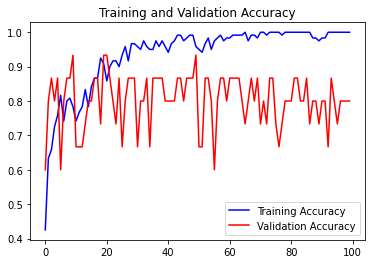

<Figure size 432x288 with 0 Axes>

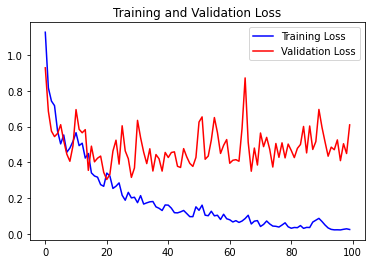

In [ ]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**14. Evaluate model performance on test dataset**

In [ ]:
test_output= model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
print(test_output)
print(model.metrics_names)

1/1 [==============================] - 0s 45ms/step - loss: 0.9659 - acc: 0.8667
[0.9658747315406799, 0.8666666746139526]
['loss', 'acc']


References:

1. https://pypi.org/project/split-folders/
2. https://keras.io/